# Relationship Between Countries' Household Disposable Income Growth Rate and National Happiness Index

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

This project was conducted to study the relationship between disposable income growth rates and happiness indices between nations involved in the Organization for Economic Cooperation and Development (OECD). We chose and cleaned data sourced from the OECD and World Happiness Index mission survey, which we then merged into one super dataset to contain our desired and filtered information. Although background studies backed the idea of a correlation, the exploratory visualizations and statistical tests we ran, both on small and large subsets of the data, did not support that idea. We had p-values far too high for any conclusive correlation to be drawn. As such, we cannot conclude that disposable income affects the happiness index, or any of its component factors of countries in the OECD. 

# Names

- Gokul Prasad
- Carmen Li
- Caroline Xiong
- Iisha Kshatriya
- Vanessa Chen

<a id='research_question'></a>
# Research Question

*What trends can be found between a country’s happiness index and its annual household disposable income growth rate? To what extent do factors such as healthy life expectancy, social support, freedom to make life choices, generosity, and corruption perception, affect a country’s annual household disposable income growth rate?*

<a id='background'></a>

## Background & Prior Work

“Money doesn’t buy happiness” is a common expression that people have heard at least once in their lifetime. However, several studies have shown that this saying is not as accurate as it is widely believed to be. A 2001 study at the Melbourne Institute of Applied Economic and Social Research in Australia showed that there was a positive correlation of 0.11 between Australians’ disposable income and life satisfaction in its preliminary results (1). A more recent 2019 study conducted in Romania analyzed data that measured the income levels and happiness indices for 26 European countries; the results further provide support that money does have an effect on happiness. Research found that there was a 0.852 R-Squared value between happiness and income (2). Given that a 0.75 R-Squared value is, by rule of thumb, considered substantial to conclude a correlation between two variables, this study’s R-Squared value of 0.852 allowed for a significant positive correlation between happiness and income to be concluded.

Evidently, there are a plethora of reports and studies that debunk the saying that “money doesn’t buy happiness.” However, being conducted two decades ago, the Australian study is outdated in addition to being restricted to the Australian population. The Romanian study is recent but relates happiness to income without taking into account external factors, such as taxes. Our project seeks to focus on using disposable income as the measure of “money”, since disposable income is the amount of money a household has left to spend after removing necessary costs. Furthermore, we seek to elevate analysis of the correlation between happiness and disposable income to a global scale in order to see if there is a correlation regardless of culture. 

References:
- 1) https://ftp.iza.org/dp1032.pdf
- 2) https://link.springer.com/article/10.1007/s11482-019-09714-3

# Hypothesis


We hypothesize that a country that experiences a shift in household disposable income will see a corresponding shift in their happiness index. Disposable income reflects the financial strength of a country’s individuals better than GDP, and since these individuals are the ones to determine the happiness index, then a positive growth in disposable income should lead to a higher self-evaluation of their life satisfaction.

# Dataset(s)

## 1) World Happiness 2015-2019 

- Dataset Name: World Happiness 2015-2019
- Link to the dataset: https://data.world/sventurini/world-happiness-2015-2019
- Number of observations: 782

This dataset contains information about 170 countries and their scores on the World Happiness Index from 2015-2019, as well as each country's voted score regarding questions about how the citizens feel about freedom of choices, corruption, and other aspects of their nation. It also contains information peritinent to grouping variables together such as year of observation, and region of country. Each row is one country in one year. 

## 2) Net Household Disposable Income 2015-2019 

- Dataset Name: Household Disposable Income
- Link to the dataset: https://data.oecd.org/hha/household-disposable-income.htm
- Number of observations: 173

This dataset contains information about 38 OECD countries and their annual household disposable income growth rates from 2015-2019. Each row is one country's net household disposable income growth rate for one year. In this dataset, data for four countries (United States, Japan, New Zealand, and Costa Rica) do not have full data for every year between 2015-2019. As a result, we will use existing data and note this in our analysis that there was missing data.

We plan on using these two datasets to determine if there is a relationship between factors that determine the World Happiness Index (e.g. healthy life expectancy, social support, freedom to make life choices, generosity, corruption perception) and the net household disposable income growth rate between years in the range of 2015-2019.

# Setup

In [2]:
# Basic data science and visualization packages 
import pandas as pd
import numpy as np
import seaborn as sns

# scikit-learn packages for analysis
import patsy
import statsmodels.api as sm

# Data Cleaning

Firstly, we'll read in the 'data.world' dataset containing information about the World Happines Index from 2015-2019. We'll read it into a Pandas DataFrame variable called `happiness` and then take a look at the first few rows to see what values it contains. 

In [3]:
happiness = pd.read_csv('worldHappiness2015-2019.csv')
happiness.head()

,Overall rank,Year,Country,Region,Score,GDP,Social_Support,Health_life_expectancy,Freedom_to_choices,Generosity,Perceptions_of_corruption
0,1,2015,Switzerland,Western Europe,7.587,1.397,1.350,0.941,0.666,0.297,0.420
1,2,2015,Iceland,Western Europe,7.561,1.302,1.402,0.948,0.629,0.436,0.141
2,3,2015,Denmark,Western Europe,7.527,1.325,1.361,0.875,0.649,0.341,0.484
3,4,2015,Norway,Western Europe,7.522,1.459,1.331,0.885,0.670,0.347,0.365
4,6,2015,Finland,Western Europe,7.406,1.290,1.318,0.889,0.642,0.234,0.414


As we can see, some of the columns are awkwardly named with underscores, so we can use some DataFrame functionality to render these more readable to a viewer. Firstly, we'll replace the underscores with spaces, and then capitalize the words properly. This will mess with the GDP column, so we'll rename that one properly afterwards too. 

In [4]:
happiness.columns = happiness.columns.str.replace('_', ' ').str.title()
happiness = happiness.rename(columns = {'Gdp':'GDP'})
happiness = happiness.rename(columns = {'Score':'Happiness Index'})
happiness.head()

,Overall Rank,Year,Country,Region,Happiness Index,GDP,Social Support,Health Life Expectancy,Freedom To Choices,Generosity,Perceptions Of Corruption
0,1,2015,Switzerland,Western Europe,7.587,1.397,1.350,0.941,0.666,0.297,0.420
1,2,2015,Iceland,Western Europe,7.561,1.302,1.402,0.948,0.629,0.436,0.141
2,3,2015,Denmark,Western Europe,7.527,1.325,1.361,0.875,0.649,0.341,0.484
3,4,2015,Norway,Western Europe,7.522,1.459,1.331,0.885,0.670,0.347,0.365
4,6,2015,Finland,Western Europe,7.406,1.290,1.318,0.889,0.642,0.234,0.414


Secondly, we'll read in the 'data.world' dataset containing information about the Household Disposable Income from 2015-2019. We'll read it into a Pandas DataFrame variable called `hdi` and then take a look at the first few rows to see what values it contains. 

In [5]:
hdi = pd.read_csv('householdDisposableIncome2015-2019.csv')
hdi.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HHDI,NET,AGRWTH,A,2015,1.331200,NaN
1,AUS,HHDI,NET,AGRWTH,A,2016,2.061030,NaN
2,AUS,HHDI,NET,AGRWTH,A,2017,2.089534,NaN
3,AUS,HHDI,NET,AGRWTH,A,2018,1.981832,NaN
4,AUS,HHDI,NET,AGRWTH,A,2019,4.389412,NaN


We can see that the headers of the columns have inconsistent capitalization and confusing column names. Since we have decided to analyze the overall growth of household disposable income in each nation using the net perspective, we have some additional columns that aren't necessary and can be dropped.

In [6]:
hdi.columns = map(str.title, hdi.columns)
hdi = hdi.drop(columns=['Indicator','Subject', 'Measure', 'Frequency', 'Flag Codes'])
hdi = hdi.rename(columns = {'Location':'Country'})
hdi = hdi.rename(columns = {'Time':'Year'})
hdi = hdi.rename(columns = {'Value':'Growth Rate'})

hdi.head()

,Country,Year,Growth Rate
0,AUS,2015,1.331200
1,AUS,2016,2.061030
2,AUS,2017,2.089534
3,AUS,2018,1.981832
4,AUS,2019,4.389412


To correspond with our other dataset, we will adjust the naming of each 

In [7]:
countryAbbr = ['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
               'GRC', 'HUN', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD',
               'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'GBR',
               'USA', 'EST', 'RUS', 'SVN', 'ZAF', 'EA', 'EU', 'LVA', 'CRI', 'LTU']
countryFull = ["Australia", "Austria", "Belgium", "Canada", "Czech Republic", "Denmark", "Finland", "France", "Germany", 
               "Greece", "Hungary", "Ireland", "Italy", "Japan", "Korea", "Luxembourg", "Mexico", "Netherlands", 
               "New Zealand", "Norway", "Poland",  "Portugal", "Slovak Republic", "Spain", "Sweden", "Switzerland", "United Kingdom", 
               "United States", "Estonia", "Russia", "Solvenia", 
               "South Africa", "Euro Area", "European Union", "Latvia", "Costa Rica", "Lithuania"]

hdi['Country'] = hdi['Country'].replace(countryAbbr, countryFull, regex = True)
hdi.head()

,Country,Year,Growth Rate
0,Australia,2015,1.331200
1,Australia,2016,2.061030
2,Australia,2017,2.089534
3,Australia,2018,1.981832
4,Australia,2019,4.389412


Now that we have a list of OECD countries, we can modify our happiness index data to only contain data for countries that are in the OECD so that we are analyzing data of the same countries as in the annual household disposable income growth rate data.

In [8]:
happiness = happiness[happiness['Country'].isin(countryFull)]
happiness.head()

,Overall Rank,Year,Country,Region,Happiness Index,GDP,Social Support,Health Life Expectancy,Freedom To Choices,Generosity,Perceptions Of Corruption
0,1,2015,Switzerland,Western Europe,7.587,1.397,1.350,0.941,0.666,0.297,0.420
2,3,2015,Denmark,Western Europe,7.527,1.325,1.361,0.875,0.649,0.341,0.484
3,4,2015,Norway,Western Europe,7.522,1.459,1.331,0.885,0.670,0.347,0.365
4,6,2015,Finland,Western Europe,7.406,1.290,1.318,0.889,0.642,0.234,0.414
5,7,2015,Netherlands,Western Europe,7.378,1.329,1.280,0.893,0.616,0.476,0.318


# Data Analysis & Results

**Firstly, let's make histograms of our two big data-values: Disposable income growth rate and happiness index. Our histograms will give a broad overview of the variable's distribution so we know what to expect in our analysis.**

### Happiness Index
To view the distribution of the happiness index, we used pandas' `hist()` functionality as shown below. 

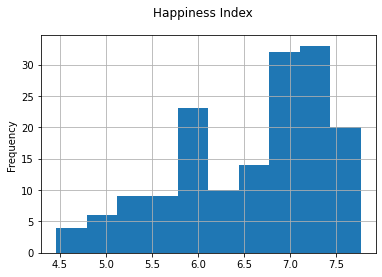

In [9]:
happiness["Happiness Index"].plot(kind = 'hist', subplots = True, sharex = True, 
                                  sharey = True, grid = True, title = 'Happiness Index');

The histogram displays a bimodal distribution as the data peaks at 6.0 and 7.0. These two peaks indicates that most nations fall under two general subgroups with a lower (6.0) and higher (7.0) rating of happiness. We suggest that this may be correlated to differences in developing and developed countries, both with drastically different qualities of life, as well as other possible factors impacting the subgroups. In terms of analysis, this grouping consequently may lead to bimodial behavior in other data, as nations within the same group may share multiple attributes that similarily influence other happiness indices.

### Household Disposable Income Growth Rate
To view the distribution of the disposable income, we used pandas' `hist()` functionality as shown below. 

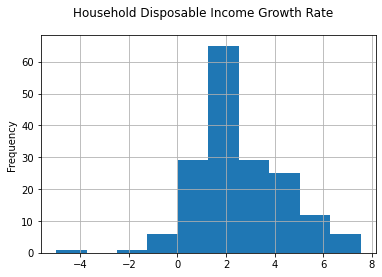

In [10]:
hdi["Growth Rate"].plot(kind = 'hist', subplots = True, sharex = True, 
                        sharey = True, grid = True, title = 'Household Disposable Income Growth Rate');

We can see that the disposable income growth displays a unimodal but slightly skewed left distribution. The graph displays an edge peak distribution as there exists a large peak at 2. There seems to be no determinable correlation between the disposable income growth plot and happiness index plot.

**Next, we will view the distribution for each factor of the happiness index that we are evaluating: social support, health life expectancy, freedom to choices, generosity, and perceptions of corruption. We used pandas' `hist()` functionality as shown below.**

The values for each of these sub factors are the estimated extent to which they contribute to making life evaluations higher in each country than if they were in a state of Dystopia. Dystopia is defined to be a hypothetical country that has values equal to the lowest national averages in the world. The idea behind Dystopia is to establish a benchmark to which countries can be favorably compared to because no country can have worse evaluations than Dystopia. The values for these sub factors take into account the average life evaluations in Dystopia and each country's residual, representing the average amount by which the country's overall happiness index is higher as a result of performing better than Dystopia. These factors are an attempt to rationalize why some countries rank higher or lower. 

### Social Support

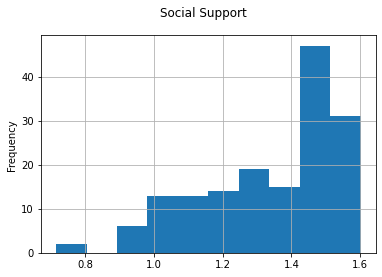

In [11]:
happiness["Social Support"].plot(kind = 'hist', subplots = True, sharex = True, 
                                 sharey = True, grid = True, title = 'Social Support');

### Healthy Life Expectancy

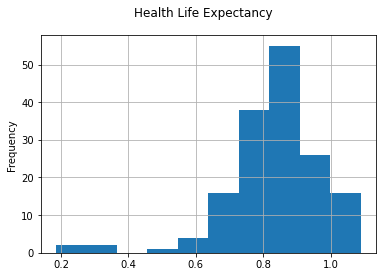

In [12]:
happiness["Health Life Expectancy"].plot(kind = 'hist', subplots = True, sharex = True, 
                                         sharey = True, grid = True, title = 'Health Life Expectancy');

### Freedom to Life Choices

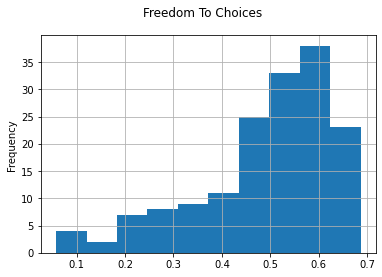

In [13]:
happiness["Freedom To Choices"].plot(kind = 'hist', subplots = True, sharex = True, 
                                     sharey = True, grid = True, title = 'Freedom To Choices');

### Generosity

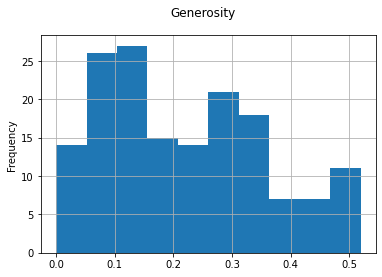

In [14]:
happiness["Generosity"].plot(kind = 'hist', subplots = True, sharex = True, 
                             sharey = True, grid = True, title = 'Generosity');

### Perceptions of Corruption

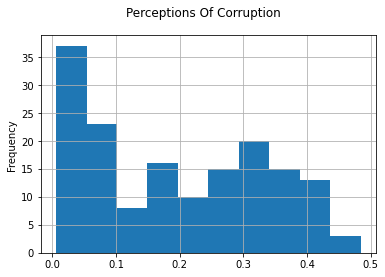

In [15]:
happiness["Perceptions Of Corruption"].plot(kind = 'hist', subplots = True, sharex = True, 
                                            sharey = True, grid = True, title = 'Perceptions Of Corruption');

Social Support, Health Life Expectency, and Freedom to Choices seem to be skewed left, while Generosity and Perceptions of Corruption have multimodal  distributions. 

The density of high Social Support, Health Life Expectency, and Freedom to Choices ratings may be correlated to a general consensus that a majority of OECD nations are satisfied with these factors. Therefore, these three indices do not seem to be impacted by the bimodal behavior of the happiness index data.

On the other hand, the multimodal distribution of Generosity and Perceptions of Corruption imply that there are varying levels of satisfaction with the population's overall generosity and nation's strong presence of corruption amongst these nations. These two factors may have been impacted by the bimodal behavior of the happiness index data. A possible explanation of this may relate to the earlier suggestion of two distinct subgroups each OECD nation falls under -- more developed countries may exhibit more satisfaction with these two factors, while less developed countries may exhibit significantly less satisfaction with these two factors.

**Now, we'll create a merged dataframe of our country's information, including name, year of observation, disposable income level, and score for each of the factors. We get this dataframe using pandas' merge() functionality, and see as below.**

In [16]:
subset_1 = hdi[['Country', 'Year', 'Growth Rate']]
subset_2 = happiness[['Country', 'Year', 'Happiness Index', 'Social Support', 'Health Life Expectancy', 'Freedom To Choices', 'Generosity', 'Perceptions Of Corruption']]

hdi_and_happ = pd.merge(subset_1, subset_2, how = 'inner')
hdi_and_happ.head()

,Country,Year,Growth Rate,Happiness Index,Social Support,Health Life Expectancy,Freedom To Choices,Generosity,Perceptions Of Corruption
0,Australia,2015,1.331200,7.284,1.309,0.932,0.651,0.436,0.356
1,Australia,2016,2.061030,7.313,1.105,0.851,0.568,0.474,0.323
2,Australia,2017,2.089534,7.284,1.510,0.844,0.602,0.478,0.301
3,Australia,2018,1.981832,7.272,1.573,0.910,0.647,0.361,0.302
4,Australia,2019,4.389412,7.228,1.548,1.036,0.557,0.332,0.290


**Next, we'll take a quick look at each country's happiness index distribution versus growth rates by year in the form of a scatterplot. We've included the three most visually different scatterplots to demonstrate the point that these scatterplots form no consistent pattern across years.**

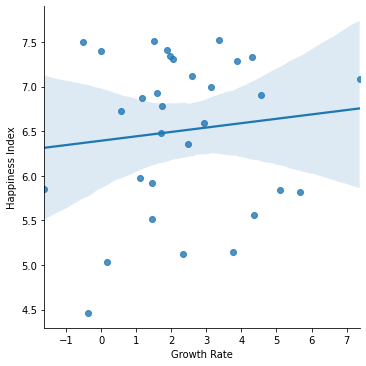

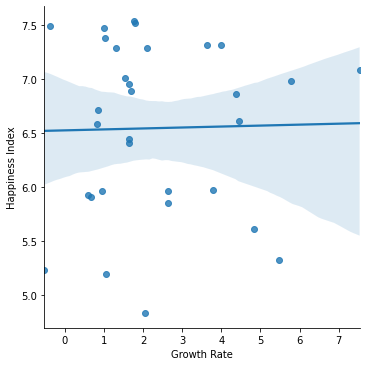

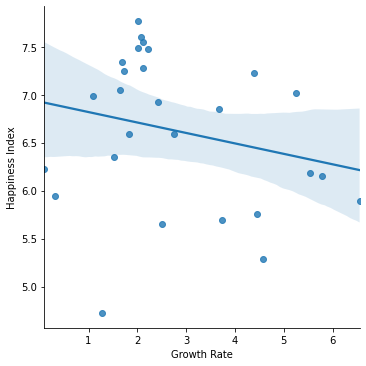

In [22]:
hdi_and_happ_2016 = hdi_and_happ.loc[hdi_and_happ['Year'] == 2016]
hdi_and_happ_2017 = hdi_and_happ.loc[hdi_and_happ['Year'] == 2017]
hdi_and_happ_2019 = hdi_and_happ.loc[hdi_and_happ['Year'] == 2019]


sns.lmplot(x = 'Growth Rate', y = 'Happiness Index', data = hdi_and_happ_2016, fit_reg = True)
sns.lmplot(x = 'Growth Rate', y = 'Happiness Index', data = hdi_and_happ_2017, fit_reg = True)
sns.lmplot(x = 'Growth Rate', y = 'Happiness Index', data = hdi_and_happ_2019, fit_reg = True)

One possible reason for this spread of correlations is that growth rate is a statistic measured across two years, while happiness index is a single year value. As such, the idea of "increase", "decrease", "positive", and "negative" are not the same between the two. This makes honing down on some pattern harder, which we note in our observations. 

**Next, having taken a comparative look at each factor versus growth rate via scatterplots, we note that perception of corruption is the most visually correlated with growth rate. We choose not to include every single graph in order to make the report more clear to the reader.**

### Perceptions of Corruption vs. Disposable Income Growth Rate

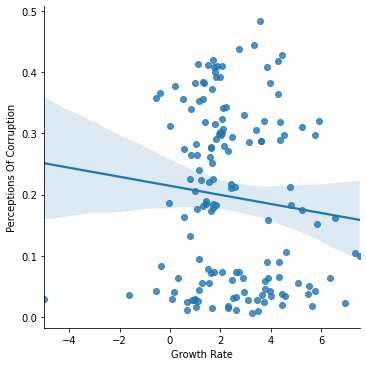

In [23]:
sns.lmplot(x = 'Growth Rate', y = 'Perceptions Of Corruption', data = hdi_and_happ, fit_reg = True)

**Now, we can perform linear regression to confirm our belief that changes in the growth rate of a country reflects changes in how corrupt the country is perceived.**

Firstly, we'll subset the dataframe to only containing the columns 'Perceptions Of Corruption' and 'Growth Rate'. Since we will be using `dmatrices()` from the `patsy` library to construct design matrices from our formula, we'll rename the columns to be readable by the function. 

In [24]:
subset = hdi_and_happ[['Perceptions Of Corruption', 'Growth Rate']].rename(
    columns = {'Perceptions Of Corruption': 'corruption', 'Growth Rate': 'growth_rate'})

Next, we'll run `dmatrices()` with the formula connecting corruption with growth rate, and generate two matrices. We'll input these values, labeled X and y, into sm's ordinary-least-squares, or `OLS()`, function and fit the model. We've chosen to use `OLS` because we want to best estimate the unknown parameters of our linear modes. 

In [25]:
y, X = patsy.dmatrices('corruption ~ growth_rate', subset)
model = sm.OLS(y, X).fit()

Finally, we can run the `summary()` function to get our coefficient and p-value to see how useful our model is.

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             corruption   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.433
Date:                Thu, 09 Dec 2021   Prob (F-statistic):              0.233
Time:                        23:29:25   Log-Likelihood:                 82.301
No. Observations:                 149   AIC:                            -160.6
Df Residuals:                     147   BIC:                            -154.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2144      0.019     11.198      0.000       0.177       0.252
growth_rate    -0.0074      0.006     -1.197      0.233      -0.020       0.005
==============================================================================
Omnibus:                      140.183   Durbin-Watson:                   0.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.633
Skew:                           0.139   Prob(JB):                      0.00298
Kurtosis:                       1.660   Cond. No.                         5.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see, the likelihood of generating these, or more extreme, values due to random chance is about 23%, which is well above the standard statisical threshold of 5%. As such, we fail to reject the null hypothesis for this test, which is that there is no statisical correlation between growth rate and corruption perception. 

Therefore, we cannot be sure that there really exists any linear relationship between a country's perceived corruption score, and its disposable income growth rate. 

This is further made clear by looking at the coefficient, which is -0.0074, denoting that if there exists any linear pattern, the change between values is incredibly small. 

**Next, we can perform linear regression to confirm our belief that changes in the household disposable income growth rate of a country reflects changes in the overall happiness index.**

Firstly, we'll subset the dataframe to only contain the columns 'Happiness Index' and 'Growth Rate' and disregarding year here in order to get an overall view of the relationship between the two variables.

In [27]:
subset2 = hdi_and_happ[['Happiness Index', 'Growth Rate']].rename(
    columns = {'Happiness Index': 'happiness_index', 'Growth Rate': 'growth_rate'})

Next, we'll run `dmatrices()` with the formula connecting happiness index with growth rate, and generate two matrices. We'll input these values, labeled X2 and y2, into sm's ordinary-least-squares, or `OLS()`, function and fit the model. 

In [28]:
y2, X2 = patsy.dmatrices('happiness_index ~ growth_rate', subset2)
model2 = sm.OLS(y2, X2).fit()

Finally, we can run the `summary()` function to get our coefficient and p-value to see how useful our model is.

In [29]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_index   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5292
Date:                Thu, 09 Dec 2021   Prob (F-statistic):              0.468
Time:                        23:29:28   Log-Likelihood:                -183.19
No. Observations:                 149   AIC:                             370.4
Df Residuals:                     147   BIC:                             376.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.6167      0.114     58.173      0.000       6.392       6.841
growth_rate    -0.0267      0.037     -0.727      0.468      -0.099       0.046
==============================================================================
Omnibus:                       14.468   Durbin-Watson:                   0.281
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.341
Skew:                          -0.618   Prob(JB):                      0.00209
Kurtosis:                       2.321   Cond. No.                         5.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see, the likelihood of generating these, or more extreme, values due to random chance is about 47%, which is well above the standard statisical threshold of 5%. As such, we fail to reject the null hypothesis for this test, which is that there is no statisical correlation between growth rate and happiness index.

Therefore, we cannot be sure that there really exists any linear relationship between a country's happiness index and its disposable income growth rate. 

This is further made clear by looking at the coefficient, which is -0.0267, denoting that if there exists any linear pattern, the change between values is incredibly small. 

# Ethics & Privacy

### Data Collection
The World Happiness Report was written by a group of independent experts and the household disposable income dataset was published by the OECD. These datasets are made available to the public with consent from all the participants. All of the data included has been aggregated from entire populations of people. Therefore, there are no issues concerning privacy of personal information or terms of use. The sources of our datasets are also reliable and make strong attempts to collect their information in a comprehensive and unbiased way. The World Happiness Report uses rankings from nationally representative samples and the OECD compiles its data according the System of National Accounts, which is the internationally agreed standard system of measuring economic activity. 

### Potential Biases 
However, there are potential biases with the World Happiness Report datasets because the responses are self-reported and respondents may over-report, under-report, or attempt to provide socially desirable responses. It's also important to note that certain factors being measured may not translate directly into happiness and correlation does not mean causation. As we do our analysis, we avoid arriving at any conclusions suggesting otherwise. 

# Conclusion & Discussion

To conclude, the project compares the relationship between countries’ household disposable income growth rate and the National Happiness Index. Before finalizing a research question, a thorough background research was conducted. This involved analyzing several reports and research papers which examined the effect of money on happiness. However, a few of the studies overlooked external factors like taxes and some of them were conducted about 20 years ago, making the data outdated.

This helped us arrive at our research question, “What trends can be found between a country’s happiness index and its annual household disposable income growth rate? To what extent do factors such as healthy life expectancy, social support, freedom to make life choices, generosity, and corruption perception, affect a country’s annual household disposable income growth rate?”

We started off by extracting data from the Organization for Economic Cooperation and Development (OECD) website which was then cleaned, filtered, and merged into one dataset. Hence our main aim was to find a correlation between disposable income and happiness on a global scale to avoid any biases related to culture. In addition to this, we made sure to study external factors that other reports had overlooked such as social support, perceptions of corruption, freedom of life choices, and healthy life expectancy and thus multiple scatterplots and histograms for each of these factors were generated to visually examine the trends and patterns. 

We noticed that there existed a visual correlation between perceptions of corruption and growth and ran a linear ordinary-least-squares analysis to determine the parameters of the possible relation, as well as one for index versus growth rate. In both these cases, we did not find conclusive proof of a relation, and hence it did not support our hypothesis.

# Team Contributions

Gokul: Cleaned happiness index CSV file, generated and wrote about scatter plots regarding growth rate vs (perceptions of corruption, health life expectancy, generosity), ran and explained statistical tests on growth rate vs. perceptions of corruption, 


Caroline: Cleaned disposable income growth CSV file, create scatterplots for disposable income growth rate vs happiness index year-by-year, ran statistical tests on overall happiness index vs. growth rate (of all years), make histograms for each factor of happiness index


Carmen: Analyzed and explained visualizations for EDA, wrote Ethics and Privacy section, added explanations about each data set 


Vanessa: Cleaned happiness index CSV file, analyzed scatterplots for disposable income growth rate vs. happiness index, analyzed scatterplots for disposable income growth rate vs. happiness indices (social support, health life expectancy, freedom to choices, generosity, perceptions of corruption), analyzed histogram distributions and behaviors, and analyzed correlation between plots.


Iisha: Created and explained the happiness index and disposable income histograms; worked on the discussion and conclusion section of the final project


All Contributed to: Creating final video and slides